# Assignment 1 (Basic) Task 3.C

# Step 1 - Load dataset into pandas dataframe

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'


with open("SmsCollection.csv" ,"r", newline="") as fp:
    reader = csv.reader(fp, delimiter=";")
    next(reader, None)  # skip the headers
    rows = [x[:1] + x[-1:] for x in reader] 
    df = pd.DataFrame(rows,columns = ['Label', 'Text'])
    
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Dimension of dataframe (Rows,Columns)

In [2]:
df.shape

(5572, 2)

## Counting duplicates

In [3]:
subset_0 = df.iloc[:, :3]
subset_0.describe()

,Label,Text
count,5572,5572
unique,2,5114
top,ham,"Sorry, I'll call later"
freq,4825,30


## Removing duplicates

In [4]:
df = df.drop_duplicates()
df.shape

(5114, 2)

In [5]:
df.describe()

,Label,Text
count,5114,5114
unique,2,5114
top,ham,Hottest pics straight to your phone!! See me g...
freq,4461,1


## Step 2 - Transforming data

### Convert label to spam column
# Ham = 0

# Spam = 1

In [6]:
df = df.replace(['spam','ham'],[1,0])
df = df.rename(columns={'Label' : 'Spam'})
df.head()

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h2> Visualize Uppercase/lowercase letters per row <h2>

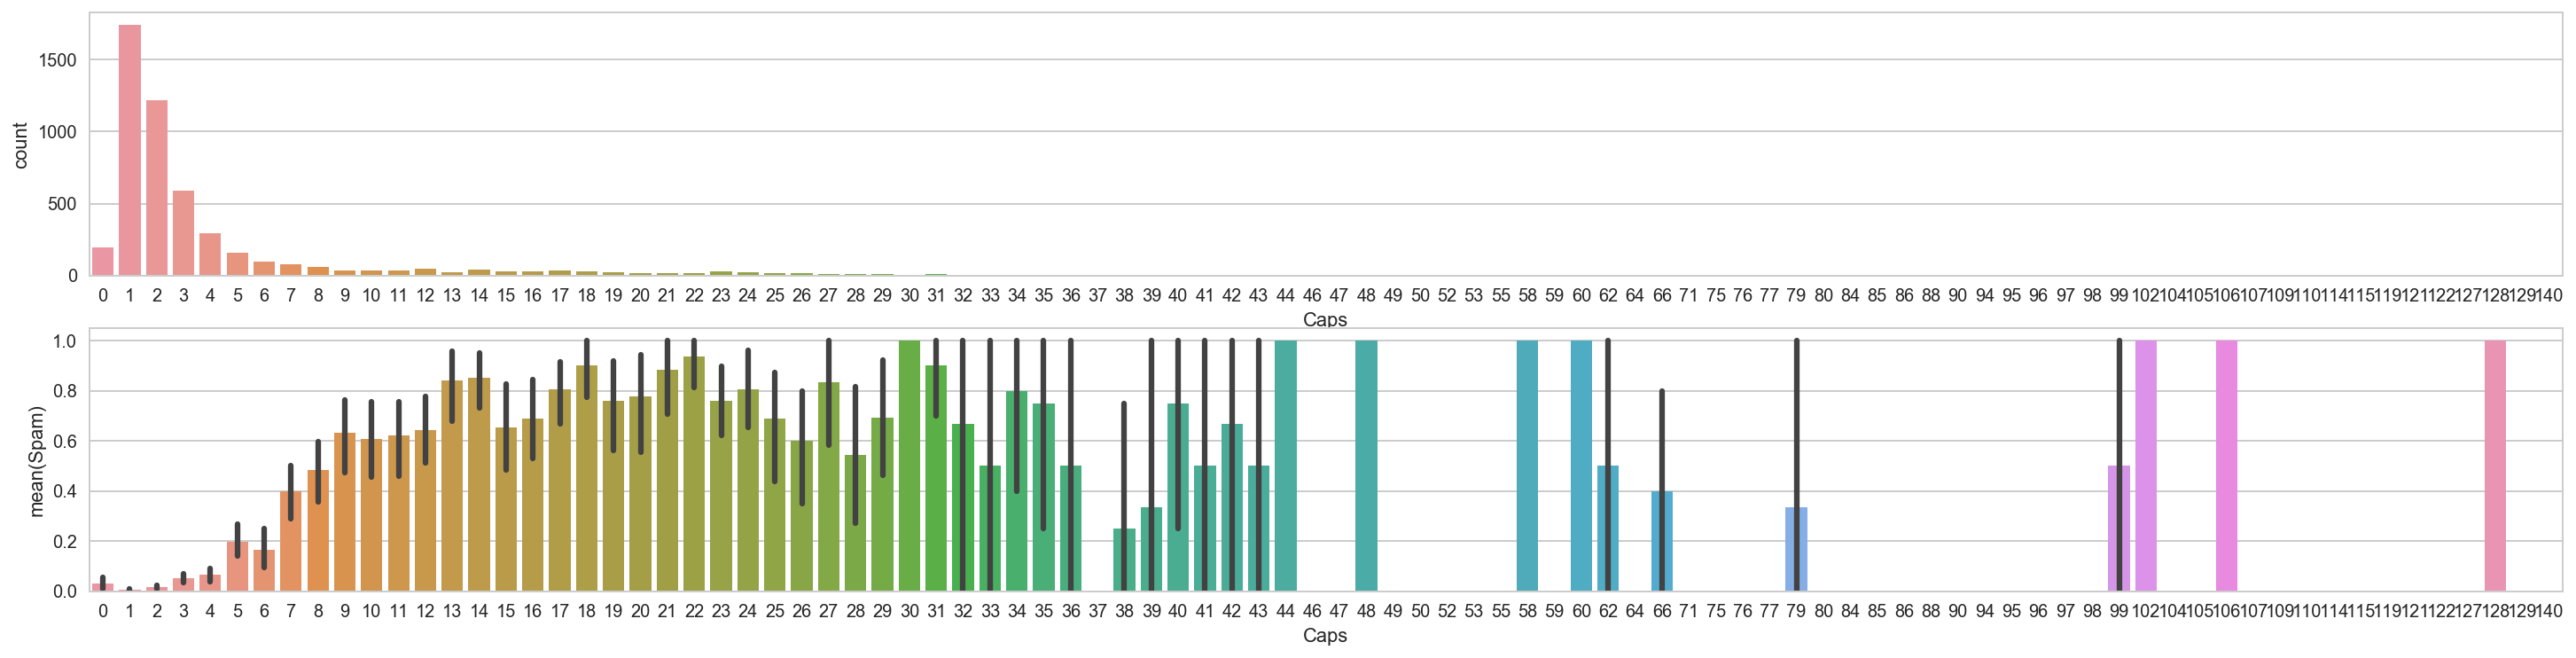

In [7]:
df["Caps"] = df["Text"].apply(lambda Text : sum(1 for c in Text if c.isupper()))
#Plot
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(25,6))
sns.countplot(x="Caps", data=df.sort_values("Caps"), ax=axis1)
g = sns.factorplot(x="Caps", y="Spam", data=df.sort_values("Caps"), kind="bar", ax=axis2) 
plt.close(g.fig)

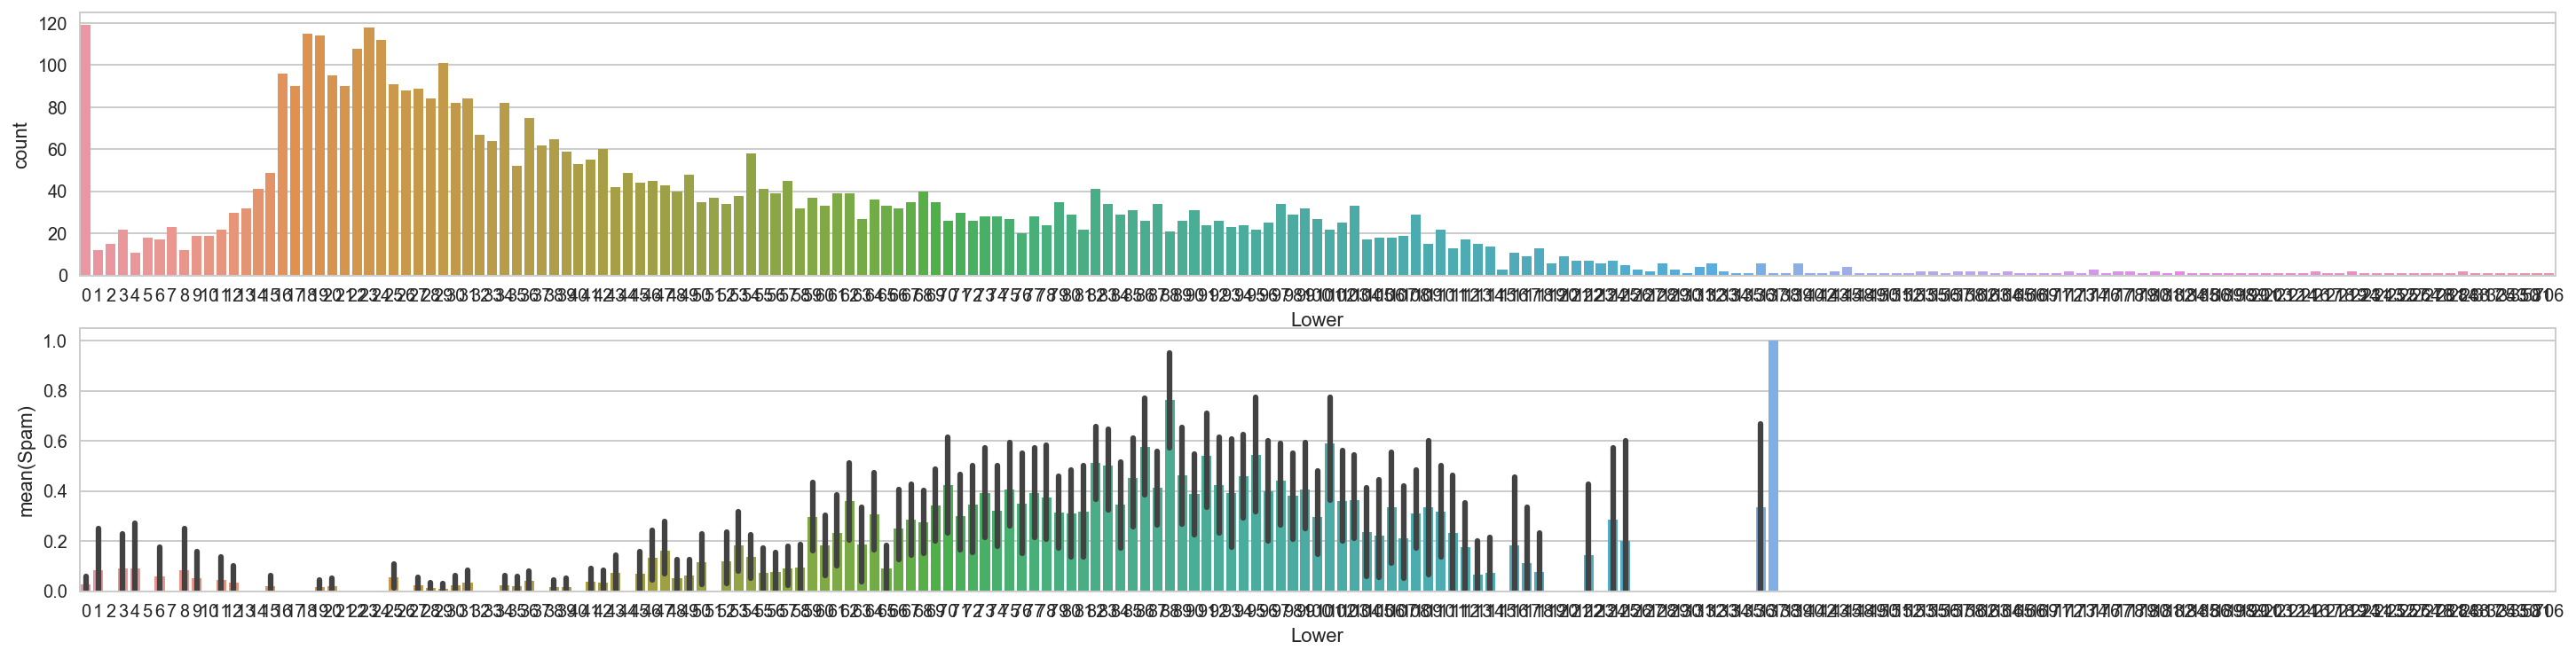

In [8]:
df["Lower"] = df["Text"].apply(lambda Text : sum(1 for c in Text if c.islower()))
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(25,6))
sns.countplot(x="Lower", data=df.sort_values("Lower"), ax=axis1)
g = sns.factorplot(x="Lower", y="Spam", data=df.sort_values("Lower"), kind="bar", ax=axis2)
plt.close(g.fig)

In [9]:
df["Lower"].describe

<bound method NDFrame.describe of 0        80
1        16
2        87
3        31
4        45
5        96
6        58
7       118
8        94
9        97
10       81
11       64
12       61
13      153
14        0
15       97
16       16
17       54
18       39
19       69
20       32
21       35
22       33
23       62
24       42
25      102
26       24
27       91
28       44
29       44
       ... 
5540      1
5541     13
5542     32
5543     29
5544     99
5545     35
5546     31
5547    103
5548      0
5549     59
5550     32
5551     38
5552     71
5554     76
5555    100
5556     43
5557    151
5559     19
5560     23
5561     45
5562     66
5563     12
5564     49
5565      6
5566     98
5567     92
5568     26
5569     39
5570     97
5571     18
Name: Lower, dtype: int64>

In [10]:
df.head()

,Spam,Text,Caps,Lower
0,0,"Go until jurong point, crazy.. Available only ...",3,80
1,0,Ok lar... Joking wif u oni...,2,16
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,10,87
3,0,U dun say so early hor... U c already then say...,2,31
4,0,"Nah I don't think he goes to usf, he lives aro...",2,45


## Messages to message length

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5AFAF55C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5B072AB70>], dtype=object)

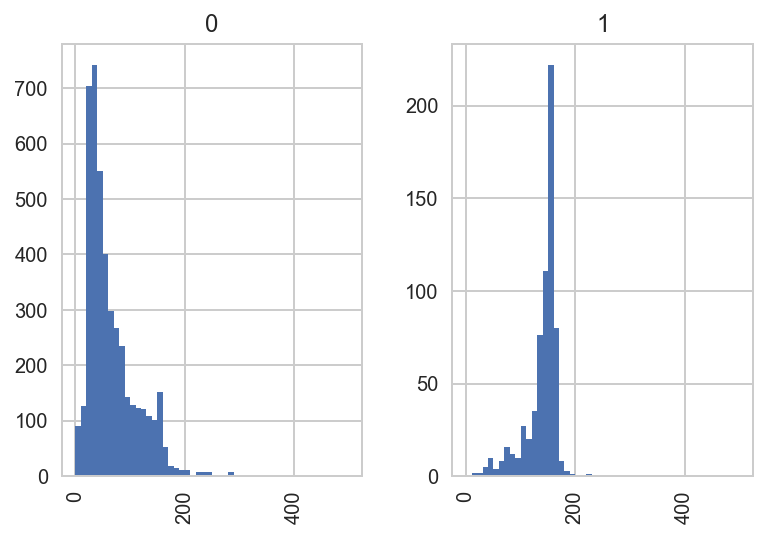

In [11]:
# Text length
df["TextLength"] =  df["Text"].apply(lambda t: len(t))

df.hist(column='TextLength', by='Spam', bins=50, range=(0,500))

In [12]:
df.head()

,Spam,Text,Caps,Lower,TextLength
0,0,"Go until jurong point, crazy.. Available only ...",3,80,111
1,0,Ok lar... Joking wif u oni...,2,16,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,10,87,155
3,0,U dun say so early hor... U c already then say...,2,31,49
4,0,"Nah I don't think he goes to usf, he lives aro...",2,45,61


# Preprocessing

<b> vectorizing text, remove punctuation and stop words by using natural language toolkits </b>

In [13]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
text_feat = df['Text'].copy()
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)
text_feat = text_feat.apply(text_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

# Step 3 -Classifiers and predictions

<b> divide dataframe 70 / 30 for training and prediction<b>

In [14]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['Spam'], test_size=0.3, random_state=111)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [16]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [17]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [18]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [19]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [20]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [21]:
Scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
Scores

,Score
SVC,0.967427
KN,0.882736
NB,0.973290
DT,0.956352
LR,0.941368
RF,0.962866
AdaBoost,0.964169
BgC,0.959609
ETC,0.963518


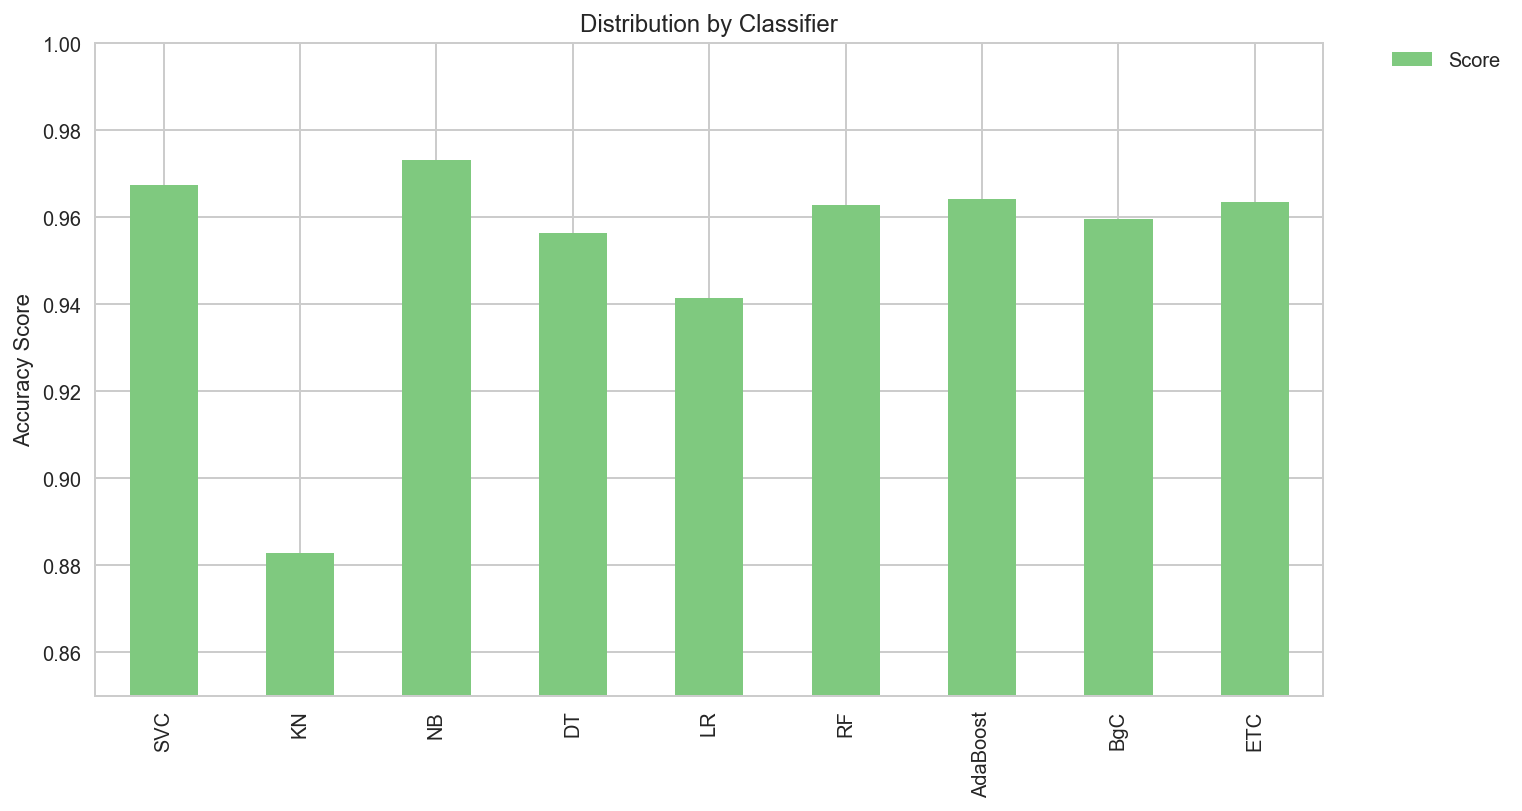

In [22]:
Scores.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), Scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 <h1>Produce a base string in an attempt to represent and predict related words</h1>

In [23]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [24]:
text_feat = text_feat.apply(stemmer)

features = vectorizer.fit_transform(text_feat)

features_train, features_test, labels_train, labels_test = train_test_split(features, df['Spam'], test_size=0.3, random_state=111)

In [25]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [26]:
Scores2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
Scores = pd.concat([Scores,Scores2],axis=1)
Scores

,Score,Score2
SVC,0.967427,0.969381
KN,0.882736,0.884691
NB,0.973290,0.973290
DT,0.956352,0.957655
LR,0.941368,0.943974
RF,0.962866,0.968078
AdaBoost,0.964169,0.965472
BgC,0.959609,0.957655
ETC,0.963518,0.966775


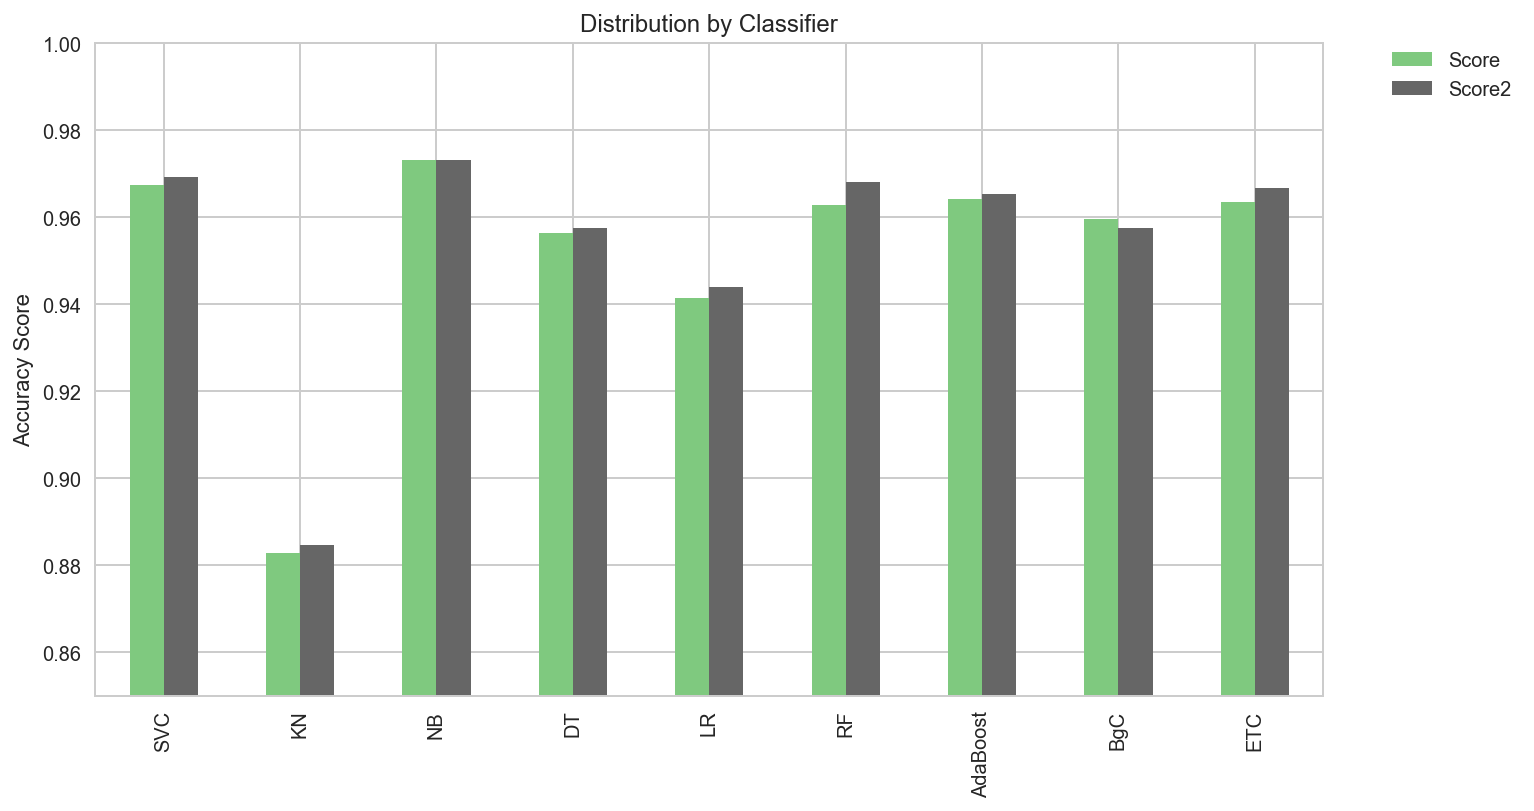

In [27]:
Scores.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), Scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Append TextLength to features & train

In [28]:
lf = df['TextLength'].as_matrix()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [29]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['Spam'], test_size=0.3, random_state=111)

In [30]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [31]:
Scores3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
Scores = pd.concat([Scores,Scores3],axis=1)
Scores

,Score,Score2,Score3
SVC,0.967427,0.969381,0.873616
KN,0.882736,0.884691,0.899023
NB,0.973290,0.973290,0.970033
DT,0.956352,0.957655,0.952443
LR,0.941368,0.943974,0.948534
RF,0.962866,0.968078,0.965472
AdaBoost,0.964169,0.965472,0.962215
BgC,0.959609,0.957655,0.955049
ETC,0.963518,0.966775,0.970033


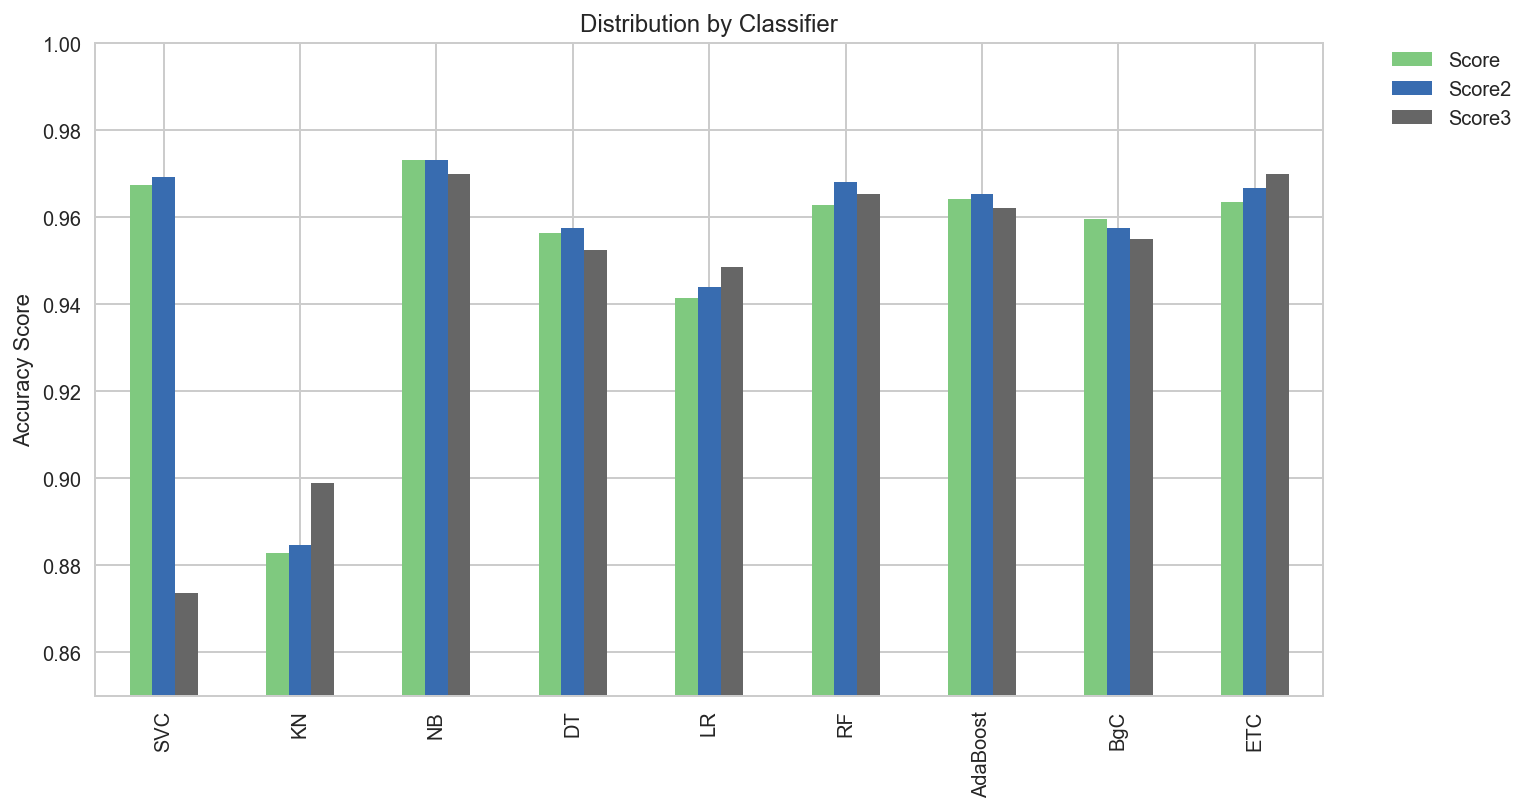

In [32]:
Scores.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), Scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Append Uppercase Letters to features & train

In [33]:
gf = df['Caps'].as_matrix()
newfeat = np.hstack((features.todense(),gf[:, None]))

In [34]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['Spam'], test_size=0.3, random_state=111)

In [35]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [36]:
Scores4 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score4'])
Scores = pd.concat([Scores,Scores4],axis=1)
Scores

,Score,Score2,Score3,Score4
SVC,0.967427,0.969381,0.873616,0.873616
KN,0.882736,0.884691,0.899023,0.928990
NB,0.973290,0.973290,0.970033,0.954397
DT,0.956352,0.957655,0.952443,0.967427
LR,0.941368,0.943974,0.948534,0.946580
RF,0.962866,0.968078,0.965472,0.971336
AdaBoost,0.964169,0.965472,0.962215,0.968078
BgC,0.959609,0.957655,0.955049,0.966775
ETC,0.963518,0.966775,0.970033,0.968730


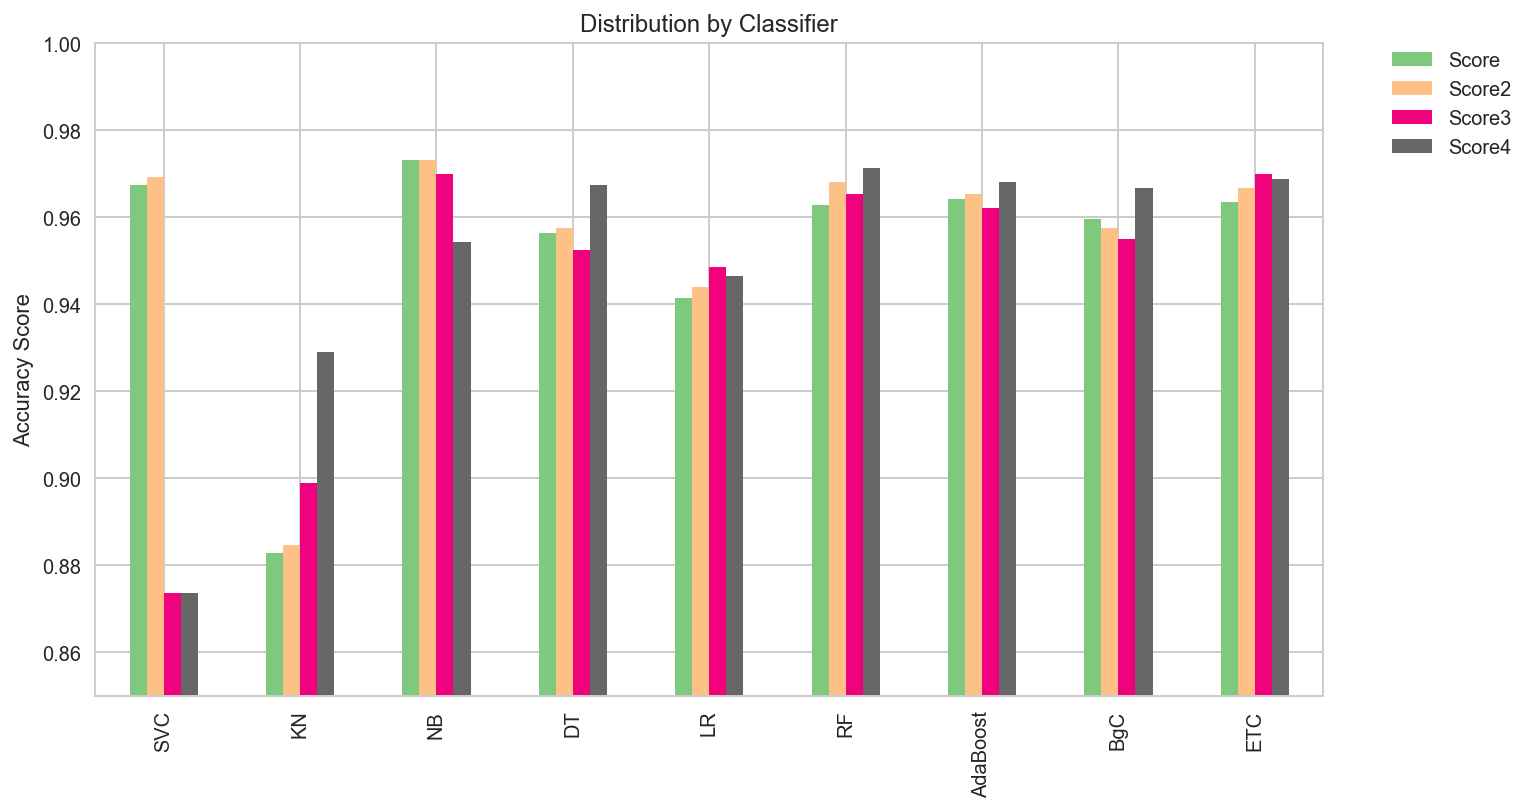

In [37]:
Scores.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), Scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Append Lowercase & train

In [38]:
ff = df['Lower'].as_matrix()
newfeat = np.hstack((features.todense(),ff[:, None]))

In [39]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['Spam'], test_size=0.3, random_state=111)

In [40]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [41]:
Scores5 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score5'])
Scores = pd.concat([Scores,Scores5],axis=1)
Scores

,Score,Score2,Score3,Score4,Score5
SVC,0.967427,0.969381,0.873616,0.873616,0.873616
KN,0.882736,0.884691,0.899023,0.928990,0.878827
NB,0.973290,0.973290,0.970033,0.954397,0.966775
DT,0.956352,0.957655,0.952443,0.967427,0.955049
LR,0.941368,0.943974,0.948534,0.946580,0.947883
RF,0.962866,0.968078,0.965472,0.971336,0.967427
AdaBoost,0.964169,0.965472,0.962215,0.968078,0.964169
BgC,0.959609,0.957655,0.955049,0.966775,0.957655
ETC,0.963518,0.966775,0.970033,0.968730,0.967427


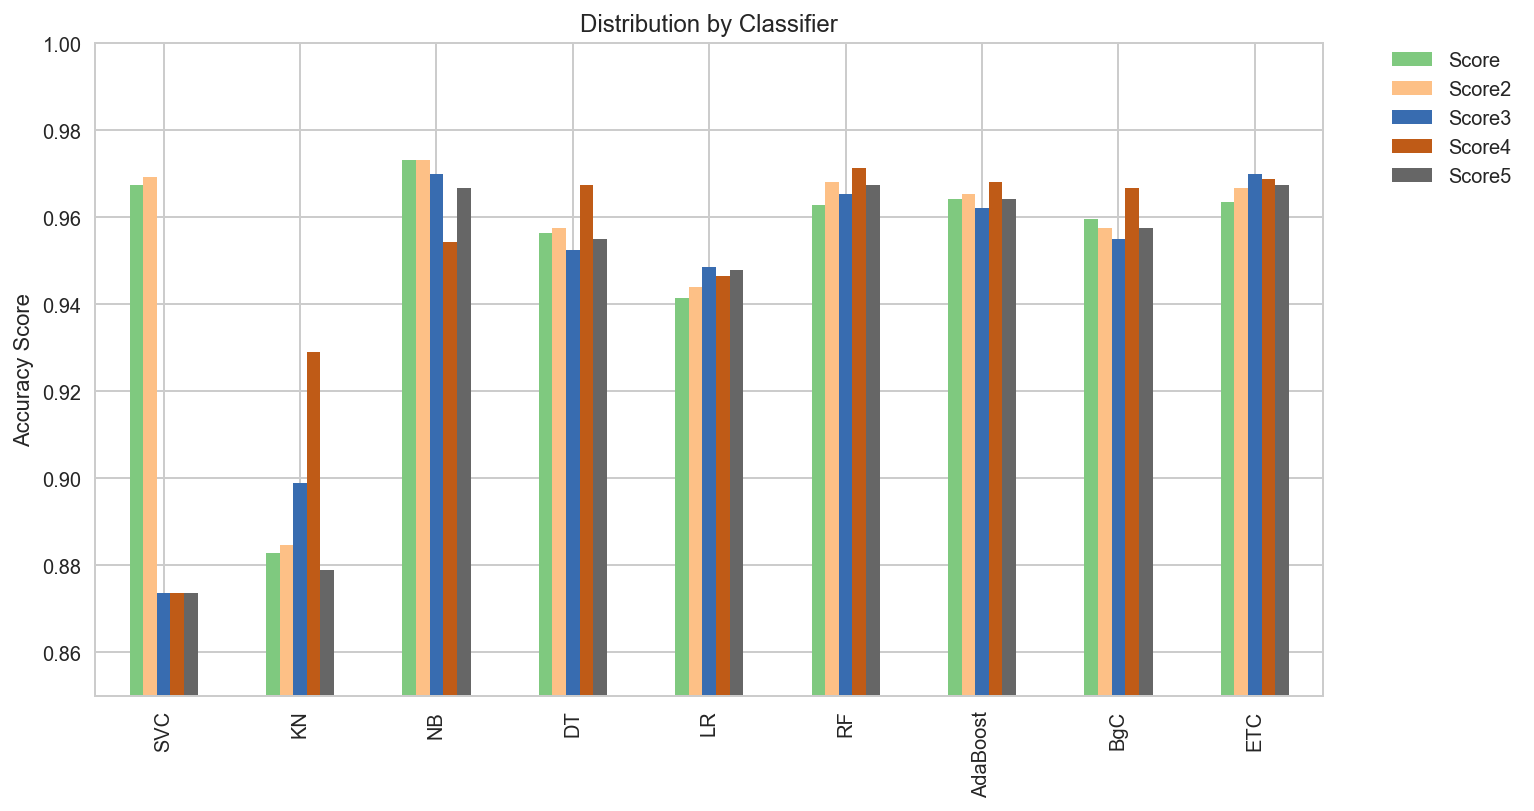

In [42]:
Scores.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), Scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [72]:
features_train.shape

(3579, 7770)

In [44]:
df.shape

(5114, 5)

In [47]:
pred_scores

[('SVC', [0.87361563517915308]),
 ('KN', [0.87882736156351793]),
 ('NB', [0.96677524429967432]),
 ('DT', [0.95504885993485344]),
 ('LR', [0.94788273615635177]),
 ('RF', [0.96742671009771986]),
 ('AdaBoost', [0.96416938110749184]),
 ('BgC', [0.95765472312703581]),
 ('ETC', [0.96742671009771986])]